Adınız:Cemil Can

Soyadınız:ÖZ

Okul Numaranız:2312729013

:GitHub Repo Bağlantısı:----------

# **Senaryo 3: Nakliye Rotasında Yakıt ve Zaman Dengesi**

Bir lojistik firması, rota seçimi sırasında yakıt tüketimi ve süreyi optimize ediyor.

• Amaç fonksiyonu:y = -2x₁ - 3x₂ + 0.1x₁x₂ (negatif toplam maliyet)

In [45]:
# Amaç fonksiyonu: y = -2x₁ - 3x₂ + 0.1x₁x₂ (negatif toplam maliyet)
def amac_fonksiyonu(x1, x2):
    return -2 * x1 - 3 * x2 + 0.1 * x1 * x2

• Değişkenler:o x₁: Ortalama hız (km/h) → [40, 100]o x₂: Araç yük kapasitesi (ton) → [2, 10]

In [46]:
# Değişkenlerin aralıkları
x1_min, x1_max = 40, 100 # Ortalama hız (km/h)
x2_min, x2_max = 2, 10   # Araç yük kapasitesi (ton)

In [47]:
#gerekli kütüphane tanımlamalraı
import random
import matplotlib.pyplot as plt

# parametre tanımlamalari
populasyon_boyutu = 50#populasyonda kaç birey olacak dengeli bir hesaplama için 50 dedim
nesil_sayisi = 100#algoritma kaç nesil boyunca devam edecekl
caprazlama_orani= 0.8#çaprazlama orani
mutasyon_orani = 0.1#yüzde 10 popuulasyon orani

# Birey sınıfı
class Birey:
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        self.uygunluk = self.uygunluk_hesapla()

    def uygunluk_hesapla(self):#amaç fonksiyon ile uygunluk değrei hesaplanir
        # Kısıtları kontrol et
        # x1 * x2 <= 700 ve x1 >= 60 olmalı
        if not (self.x1 * self.x2 <= 700 and self.x1 >= 60):
            return -float('inf')  # Kısıt ihlal edilirse uygunluk çok düşük

        # Amaç fonksiyonunu hesapla
        return -2 * self.x1 - 3 * self.x2 + 0.1 * self.x1 * self.x2

# Popülasyon oluştur
def populasyon_olustur():
    populasyon = []
    while len(populasyon) < populasyon_boyutu:
        x1 = random.uniform(40, 100)
        x2 = random.uniform(2, 10)
        birey = Birey(x1, x2)
        if birey.uygunluk > -float('inf'): # Sadece geçerli bireyleri ekle
            populasyon.append(birey)
    return populasyon

# Turnuva seçimi
def turnuva_secimi(populasyon, turnuva_boyutu=3):
    turnuva = random.sample(populasyon, turnuva_boyutu)
    return max(turnuva, key=lambda birey: birey.uygunluk)

# Çaprazlama
def caprazlama(ebeveyn1, ebeveyn2):
    if random.random() < caprazlama_orani:
        x1 = (ebeveyn1.x1 + ebeveyn2.x1) / 2 # Basit ortalama çaprazlama
        x2 = (ebeveyn1.x2 + ebeveyn2.x2) / 2 # Basit ortalama çaprazlama
        # Değerleri geçerli aralıklarda tut
        x1 = max(40, min(100, x1))
        x2 = max(2, min(10, x2))
        return Birey(x1, x2)
    else:
        return random.choice([ebeveyn1, ebeveyn2])

# Mutasyon
def mutasyon(birey):
    if random.random() < mutasyon_orani:
        if random.random() < 0.5: # x1'i veya x2'yi mutate et
            birey.x1 = random.uniform(40, 100)
        else:
            birey.x2 = random.uniform(2, 10)
    return Birey(birey.x1, birey.x2) # Yeni bir birey döndürerek uygunluğu tekrar hesapla

# Yeni nesil oluştur
def yeni_nesil_olustur(populasyon):
    yeni_populasyon = []
    while len(yeni_populasyon) < populasyon_boyutu:
        ebeveyn1 = turnuva_secimi(populasyon)
        ebeveyn2 = turnuva_secimi(populasyon)
        cocuk = caprazlama(ebeveyn1, ebeveyn2)
        cocuk = mutasyon(cocuk)
        if cocuk.uygunluk > -float('inf'): # Sadece geçerli bireyleri ekle
            yeni_populasyon.append(cocuk)
    return yeni_populasyon

# Ana döngü
populasyon = populasyon_olustur()
en_iyi_uygunluklar = []
for nesil in range(nesil_sayisi):
    populasyon = yeni_nesil_olustur(populasyon)
    en_iyi_birey_nesil = max(populasyon, key=lambda birey: birey.uygunluk)
    en_iyi_uygunluklar.append(en_iyi_birey_nesil.uygunluk)

# En iyi bireyi bul
en_iyi_birey = max(populasyon, key=lambda birey: birey.uygunluk)
print(f"En iyi çözüm: x1 = {en_iyi_birey.x1:.2f}, x2 = {en_iyi_birey.x2:.2f}, Uygunluk = {en_iyi_birey.uygunluk:.2f}")

En iyi çözüm: x1 = 60.27, x2 = 9.71, Uygunluk = -91.13


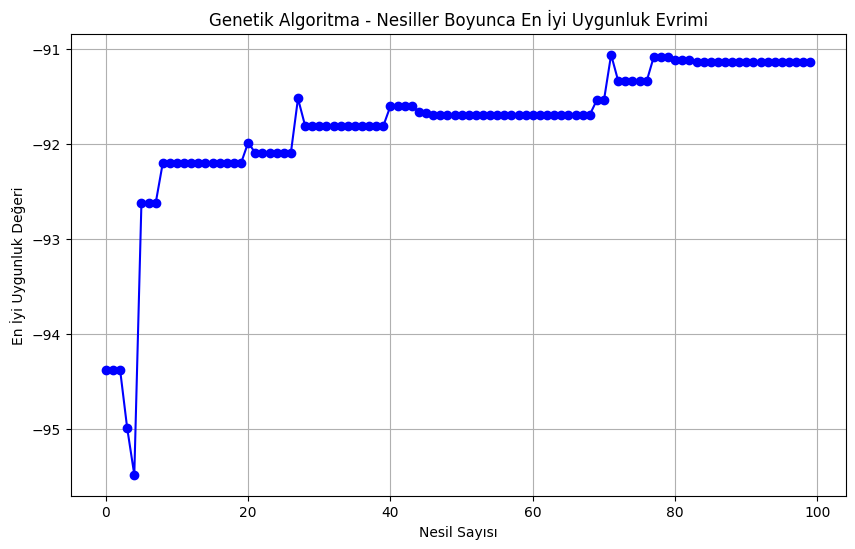

In [48]:
import matplotlib.pyplot as plt

# En iyi uygunlukların grafiğini çiz
plt.figure(figsize=(10, 6))
plt.plot(range(nesil_sayisi), en_iyi_uygunluklar, marker='o', linestyle='-', color='b')
plt.title('Genetik Algoritma - Nesiller Boyunca En İyi Uygunluk Evrimi')
plt.xlabel('Nesil Sayısı')
plt.ylabel('En İyi Uygunluk Değeri')
plt.grid(True)
plt.show()

Bu kod, lojistik firmasındaki yakıt tüketimi ve süreyi optimize etmek için bir Genetik Algoritma (Genetic Algorithm) uygulamasıdır. Amaç, belirli kısıtlar altında en iyi hız (x₁) ve araç yük kapasitesi (x₂) kombinasyonunu bulmaktır.

### **Parametreler**

*   `populasyon_boyutu`: Her nesildeki birey sayısı (çözüm adayı). Bu örnekte 50'dir.
*   `nesil_sayisi`: Algoritmanın kaç nesil boyunca çalışacağı. Bu örnekte 100'dür.
*   `crossover_orani`: Çaprazlama (crossover) işleminin gerçekleşme olasılığı. %80'dir.
*   `mutasyon_orani`: Mutasyon işleminin gerçekleşme olasılığı. %10'dur.

### **Birey Sınıfı (`Birey`)**

Bu sınıf, her bir potansiyel çözümü (bireyi) temsil eder. Bir birey:

*   `x1`: Ortalama hız (40-100 km/s arası)
*   `x2`: Araç yük kapasitesi (2-10 ton arası)
*   `uygunluk`: Amaç fonksiyonuna göre hesaplanan uygunluk değeri.

`uygunluk_hesapla` metodu, bireyin amaç fonksiyonunu hesaplar ve kısıtları kontrol eder. Eğer `x1 * x2 > 700` veya `x1 < 60` kısıtlarından herhangi biri ihlal edilirse, bireyin uygunluğu `-inf` (çok düşük) olarak atanır, bu da o çözümün tercih edilmeyeceği anlamına gelir. Amaç fonksiyonu `y = -2x₁ - 3x₂ + 0.1x₁x₂` olarak tanımlanmıştır ve algoritma bu değeri maksimize etmeye çalışır (negatif maliyet olduğu için).

### **Popülasyon Oluşturma (`populasyon_olustur`)**

Bu fonksiyon, başlangıç popülasyonunu oluşturur. Her birey için `x1` ve `x2` değerleri belirtilen aralıklar dahilinde rastgele seçilir.

### **Turnuva Seçimi (`turnuva_secimi`)**

Bu fonksiyon, mevcut popülasyondan daha iyi bireyleri seçmek için kullanılır. Belirli sayıda (varsayılan olarak 3) rastgele birey seçilir ve aralarından en yüksek uygunluğa sahip olan birey döndürülür. Bu, bir sonraki nesil için ebeveynleri seçerken daha iyi çözümlerin şansını artırır.

### **Çaprazlama (`caprazlama`)**

İki ebeveyn bireyden yeni bir 'çocuk' birey oluşturma işlemidir. Belirli bir `crossover_orani` olasılığıyla, çocuk bireyin `x1` ve `x2` değerleri ebeveynlerinden rastgele bir şekilde alınır. Çaprazlama gerçekleşmezse, ebeveynlerden biri doğrudan çocuk olarak kopyalanır.

### **Mutasyon (`mutasyon`)**

Çeşitliliği korumak ve yerel optimumlardan kaçınmak için bir bireyin özelliklerini rastgele değiştirme işlemidir. Belirli bir `mutasyon_orani` olasılığıyla, bireyin `x1` veya `x2` değeri belirtilen aralıkta rastgele yeni bir değerle güncellenir.

### **Yeni Nesil Oluşturma (`yeni_nesil_olustur`)**

Bu fonksiyon, mevcut popülasyondan yeni bir nesil oluşturur. `populasyon_boyutu` kadar yeni birey oluşturulana kadar:

1.  İki ebeveyn `turnuva_secimi` ile seçilir.
2.  Bu ebeveynlerden `caprazlama` ile bir çocuk oluşturulur.
3.  Çocuk üzerinde `mutasyon` uygulanır.
4.  Oluşan çocuk yeni popülasyona eklenir.

### **Ana Döngü ve Sonuç**

1.  Başlangıç popülasyonu `populasyon_olustur()` ile oluşturulur.
2.  Belirlenen `nesil_sayisi` kadar döngü boyunca `yeni_nesil_olustur()` çağrılarak popülasyon evrimleştirilir.
3.  Tüm nesiller tamamlandıktan sonra, en yüksek uygunluğa sahip `en_iyi_birey` (en iyi çözüm) popülasyondan seçilir ve ekrana yazdırılır. Bu, algoritmanın bulduğu en iyi hız ve yük kapasitesi kombinasyonunu ve buna karşılık gelen uygunluk (optimize edilmiş maliyet) değerini gösterir.

In [49]:
import random
import matplotlib.pyplot as plt

# Parametreler
populasyon_boyutu = 50
nesil_sayisi = 100
crossover_orani = 0.8
mutasyon_orani = 0.1

# Birey sınıfı
class Birey:
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        self.uygunluk = self.uygunluk_hesapla()

    def uygunluk_hesapla(self):
        # Kısıtları kontrol et
        # x1 * x2 <= 700 ve x1 >= 60 olmalı
        if not (self.x1 * self.x2 <= 700 and self.x1 >= 60):
            return -float('inf')  # Kısıt ihlal edilirse uygunluk çok düşük
        # Amaç fonksiyonunu hesapla
        return -2 * self.x1 - 3 * self.x2 + 0.1 * self.x1 * self.x2

# Popülasyon oluştur
def populasyon_olustur():
    populasyon = []
    while len(populasyon) < populasyon_boyutu:
        x1 = random.uniform(40, 100)
        x2 = random.uniform(2, 10)
        birey = Birey(x1, x2)
        if birey.uygunluk > -float('inf'): # Sadece geçerli bireyleri ekle
            populasyon.append(birey)
    return populasyon

# Rulet tekerleği seçimi
def rulet_tekerlegi_secimi(populasyon):
    # Uygunluk değerlerini toplu olarak hesapla
    uygunluklar = [birey.uygunluk for birey in populasyon]
    # Negatif uygunluk değerlerini düzelterek toplam uygunluk değerini hesapla
    min_uygunluk = min(uygunluklar)
    # Tüm uygunlukların pozitif olduğundan emin ol
    ayarlanmis_uygunluklar = [u - min_uygunluk + 1 if min_uygunluk < 0 else u for u in uygunluklar]
    toplam_uygunluk = sum(ayarlanmis_uygunluklar)

    # Rastgele bir sayı seç (0 ile toplam uygunluk arasında)
    rastgele_sayi = random.uniform(0, toplam_uygunluk)

    # Seçilen bireyi bul
    toplam = 0
    for i, birey in enumerate(populasyon):
        toplam += ayarlanmis_uygunluklar[i]
        if toplam >= rastgele_sayi:
            return birey

    # Eğer hiçbir birey seçilemezse, rastgele bir birey döndür (fallback)
    return random.choice(populasyon)

# Çaprazlama
def caprazlama(ebeveyn1, ebeveyn2):
    if random.random() < crossover_orani:
        x1 = (ebeveyn1.x1 + ebeveyn2.x1) / 2 # Basit ortalama çaprazlama
        x2 = (ebeveyn1.x2 + ebeveyn2.x2) / 2 # Basit ortalama çaprazlama
        # Değerleri geçerli aralıklarda tut
        x1 = max(40, min(100, x1))
        x2 = max(2, min(10, x2))
        return Birey(x1, x2)
    else:
        return random.choice([ebeveyn1, ebeveyn2])

# Mutasyon
def mutasyon(birey):
    if random.random() < mutasyon_orani:
        if random.random() < 0.5: # x1'i veya x2'yi mutate et
            birey.x1 = random.uniform(40, 100)
        else:
            birey.x2 = random.uniform(2, 10)
    return Birey(birey.x1, birey.x2) # Yeni bir birey döndürerek uygunluğu tekrar hesapla

# Yeni nesil oluştur
def yeni_nesil_olustur(populasyon):
    yeni_populasyon = []
    while len(yeni_populasyon) < populasyon_boyutu:
        # Ebeveynleri rulet tekerleği ile seç
        ebeveyn1 = rulet_tekerlegi_secimi(populasyon)
        ebeveyn2 = rulet_tekerlegi_secimi(populasyon)
        cocuk = caprazlama(ebeveyn1, ebeveyn2)
        cocuk = mutasyon(cocuk)
        if cocuk.uygunluk > -float('inf'): # Sadece geçerli bireyleri ekle
            yeni_populasyon.append(cocuk)
    return yeni_populasyon

# Ana döngü
populasyon = populasyon_olustur()
en_iyi_uygunluklar_rulet = []
for nesil in range(nesil_sayisi):
    populasyon = yeni_nesil_olustur(populasyon)
    # Popülasyon boş değilse en iyi bireyi bul
    if populasyon:
        en_iyi_birey_nesil = max(populasyon, key=lambda birey: birey.uygunluk)
        en_iyi_uygunluklar_rulet.append(en_iyi_birey_nesil.uygunluk)
    else:
        en_iyi_uygunluklar_rulet.append(-float('inf')) # Eğer popülasyon boşsa uygunluk yok

# En iyi bireyi bul
en_iyi_birey_rulet = max(populasyon, key=lambda birey: birey.uygunluk)
print(f"Rulet Tekerleği ile En iyi çözüm: x1 = {en_iyi_birey_rulet.x1:.2f}, x2 = {en_iyi_birey_rulet.x2:.2f}, Uygunluk = {en_iyi_birey_rulet.uygunluk:.2f}")

Rulet Tekerleği ile En iyi çözüm: x1 = 65.03, x2 = 9.80, Uygunluk = -95.74


### **Senaryo 3: Nakliye Rotasında Yakıt ve Zaman Dengesi (Rulet Tekerleği Seçimi ile yapılan kod)**

 Bu versiyonda **Turnuva Seçimi** yerine **Rulet Tekerleği Seçimi** kullanılmıştır.

### **Rulet Tekerleği Seçimi (`rulet_tekerlegi_secimi`)**

Bu seçim yöntemi, bireylerin uygunluk değerlerine orantılı olarak seçilme şansını belirler. Yani, uygunluk değeri yüksek olan bireylerin seçilme olasılığı daha düşüktür (çünkü amaç fonksiyonu negatif maliyeti maksimize etmeye çalışır). Çalışma prensibi şu şekildedir:

1.  **Uygunlukların Ayarlanması:** Amaç fonksiyonu negatif değerler döndürdüğü için, `rulet_tekerlegi_secimi` fonksiyonu bu değerleri pozitif hale getirmek için minimum uygunluktan çıkarır ve 1 ekler. Bu, tüm uygunlukların pozitif olmasını ve en iyi bireylerin en yüksek değere sahip olmasını sağlar.
2.  **Toplam Uygunluk:** Popülasyondaki tüm ayarlanmış uygunluk değerleri toplanır.
3.  **Rastgele Sayı Seçimi:** Toplam uygunluk ile 0 arasında rastgele bir sayı seçilir.
4.  **Birey Seçimi:** Popülasyondaki bireyler, uygunluk değerleri oranında rulet tekerleğinin dilimlerini temsil eder. Seçilen rastgele sayıya denk gelen birey, ebeveyn olarak seçilir.

### **Yeni Nesil Oluşturma (Rulet Tekerleği ile)**

Bu versiyonda `yeni_nesil_olustur` fonksiyonu, ebeveynleri seçerken `turnuva_secimi` yerine `rulet_tekerlegi_secimi` fonksiyonunu kullanır. Diğer adımlar (çaprazlama, mutasyon ve kısıt kontrolü) Turnuva Seçimi versiyonuyla aynıdır. Bu yöntem, popülasyon çeşitliliğini korumak ve yerel optimumlardan kaçınmak için farklı bir yaklaşım sunar.

### **Ana Döngü ve Sonuç (Rulet Tekerleği ile)**

Algoritmanın ana döngüsü, belirlenen nesil sayısı boyunca (`nesil_sayisi`) popülasyonu `yeni_nesil_olustur()` fonksiyonu ile evrimleştirir. Her nesildeki en iyi bireyin uygunluk değeri `en_iyi_uygunluklar_rulet` listesine kaydedilir. Döngü tamamlandığında, son popülasyondaki en iyi birey (yani, en optimize edilmiş çözüm) bulunur ve ekrana yazdırılır. Grafikte de görüldüğü üzere, bu liste kullanılarak algoritmanın evrimi görselleştirilir.

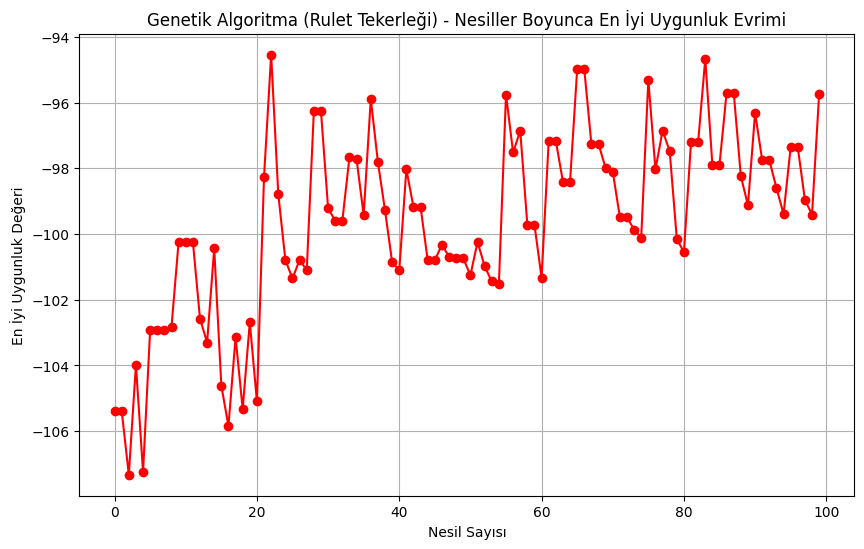

In [50]:
import matplotlib.pyplot as plt

# En iyi uygunlukların grafiğini çiz (Rulet Tekerleği)
plt.figure(figsize=(10, 6))
plt.plot(range(len(en_iyi_uygunluklar_rulet)), en_iyi_uygunluklar_rulet, marker='o', linestyle='-', color='r')
plt.title('Genetik Algoritma (Rulet Tekerleği) - Nesiller Boyunca En İyi Uygunluk Evrimi')
plt.xlabel('Nesil Sayısı')
plt.ylabel('En İyi Uygunluk Değeri')
plt.grid(True)
plt.show()